<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: *Escreva seu nome aqui.*

**ANTES DE PROSSEGUIR FAÇA UMA CÓPIA DESTE NOTEBOOK**

----

## Contexto

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Importação do dataset e das bibliotecas

In [136]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
!gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

Downloading...
From: https://drive.google.com/uc?id=1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr
To: /content/ITL-SI10-2024-P1-dataset.csv
100% 7.03k/7.03k [00:00<00:00, 20.8MB/s]


In [137]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from numpy.random import randn
from numpy import random as rn
import scipy.stats as si
from matplotlib import pyplot as plt
import seaborn as sns
import math
import random
import plotly.graph_objects as go
import plotly.express as px


# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
print(df.head())

         Data  Visitantes Únicos  Sessões  Taxa de Rejeição (%)  \
0  2023-01-01              113.0    126.0             50.496714   
1  2023-01-02               90.0    157.0             49.438007   
2  2023-01-03               92.0    185.0             49.800231   
3  2023-01-04              130.0    206.0             50.251843   
4  2023-01-05              123.0    155.0             48.070931   

   Páginas por Sessão Principais Origens do Tráfego Dispositivos  Eventos  \
0            1.834201                        Direto      Desktop        8   
1            1.955760                        Social      Desktop        5   
2            2.285052                        Direto      Desktop        9   
3            2.325464                          Pago       Mobile        6   
4            2.267006                        Direto      Desktop        6   

   Taxa de Conversão (%)  Tempo Médio de Sessão (minutos)  
0               1.952083                         5.395516  
1             

## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Data                             60 non-null     object 
 1   Visitantes Únicos                60 non-null     float64
 2   Sessões                          60 non-null     float64
 3   Taxa de Rejeição (%)             60 non-null     float64
 4   Páginas por Sessão               60 non-null     float64
 5   Principais Origens do Tráfego    60 non-null     object 
 6   Dispositivos                     60 non-null     object 
 7   Eventos                          60 non-null     int64  
 8   Taxa de Conversão (%)            60 non-null     float64
 9   Tempo Médio de Sessão (minutos)  60 non-null     float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.8+ KB


In [139]:
df.isnull().sum()

Data                               0
Visitantes Únicos                  0
Sessões                            0
Taxa de Rejeição (%)               0
Páginas por Sessão                 0
Principais Origens do Tráfego      0
Dispositivos                       0
Eventos                            0
Taxa de Conversão (%)              0
Tempo Médio de Sessão (minutos)    0
dtype: int64

In [140]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Visitantes Únicos,60.0,301.133333,120.896295,90.000000,196.500000,319.500000,401.250000,517.000000
Sessões,60.0,449.450000,182.619121,126.000000,298.750000,456.000000,616.000000,769.000000
Taxa de Rejeição (%),60.0,34.230939,10.164913,20.177732,24.860077,34.381987,43.013749,50.496714
Páginas por Sessão,60.0,4.007533,1.156751,1.834201,3.078881,4.027289,4.890745,5.996747
Eventos,60.0,5.300000,2.109703,1.000000,3.750000,5.000000,6.250000,10.000000
Taxa de Conversão (%),60.0,4.499632,1.486718,1.952083,3.329572,4.530517,5.748005,7.075193
Tempo Médio de Sessão (minutos),60.0,10.045957,3.413248,4.680899,6.915095,10.039833,13.282681,16.360085


In [141]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Data', 'Principais Origens do Tráfego', 'Dispositivos'], dtype='object')
Numerical Variables:
['Visitantes Únicos', 'Sessões', 'Taxa de Rejeição (%)', 'Páginas por Sessão', 'Eventos', 'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)']


Visitantes Únicos
Skew : -0.05


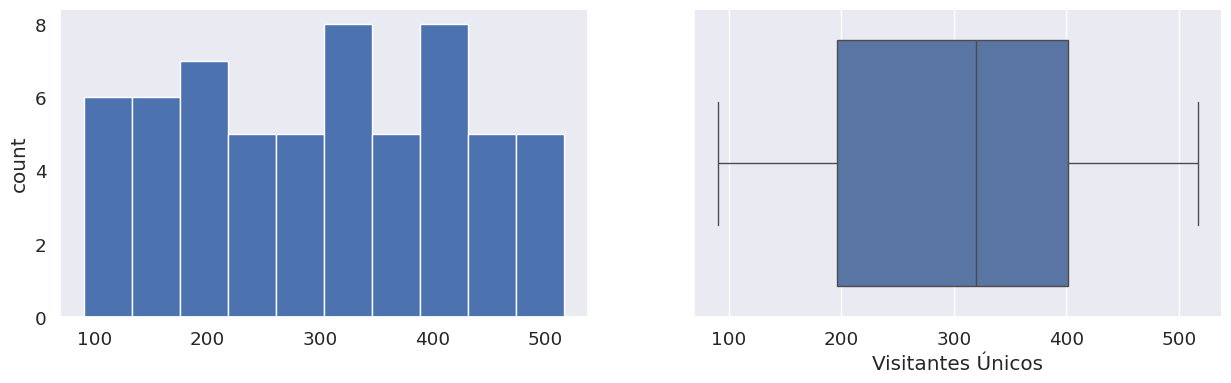

Sessões
Skew : 0.04


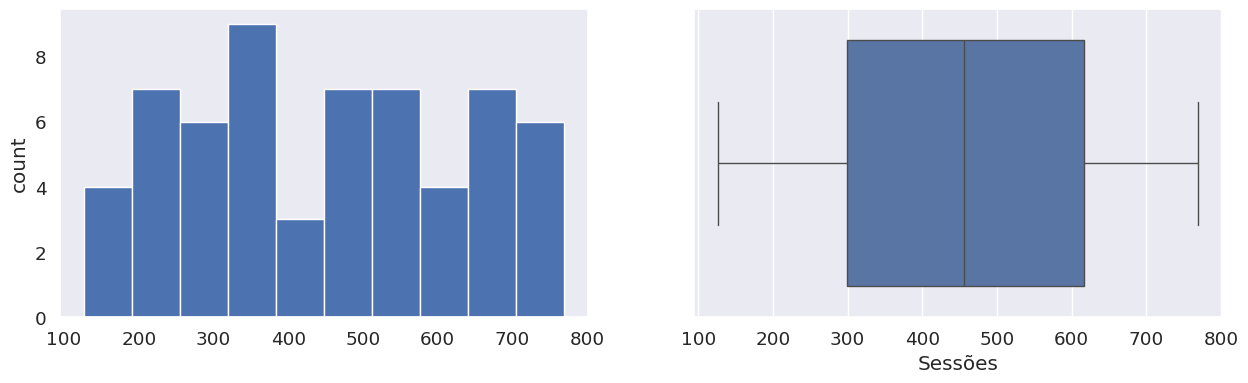

Taxa de Rejeição (%)
Skew : 0.12


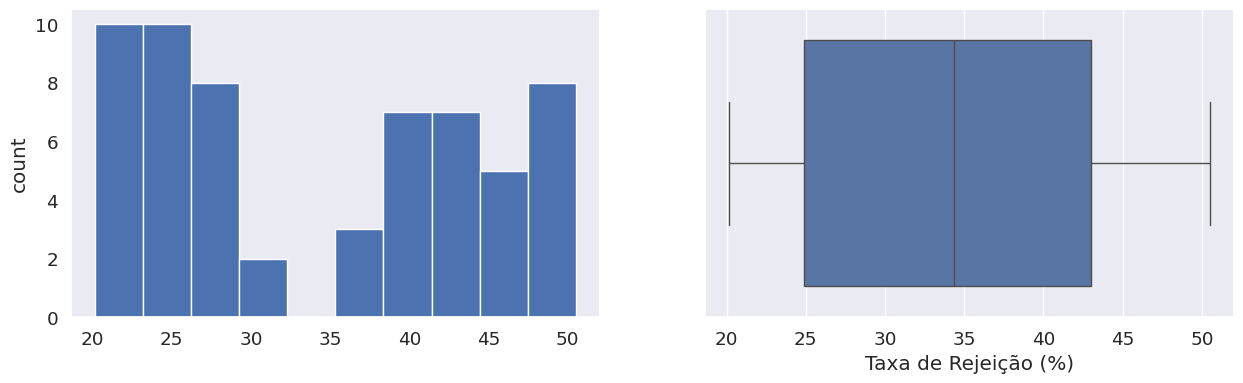

Páginas por Sessão
Skew : -0.02


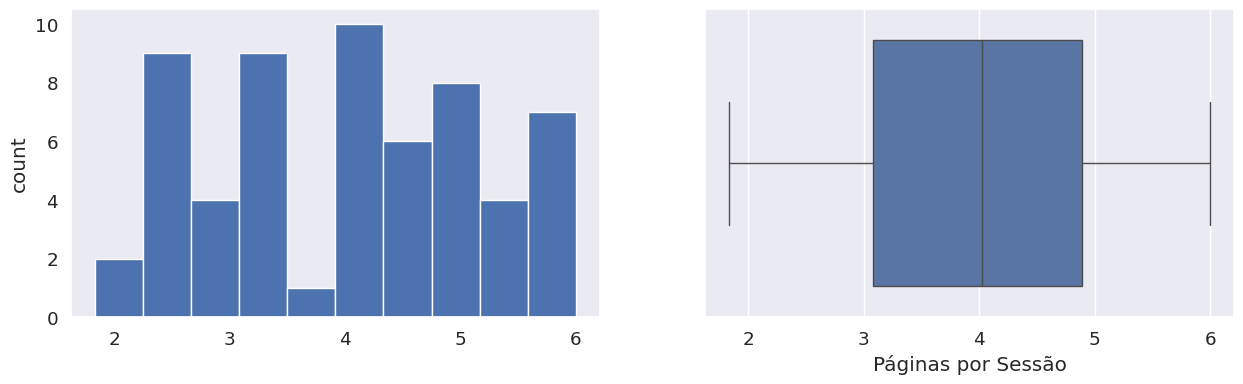

Eventos
Skew : 0.17


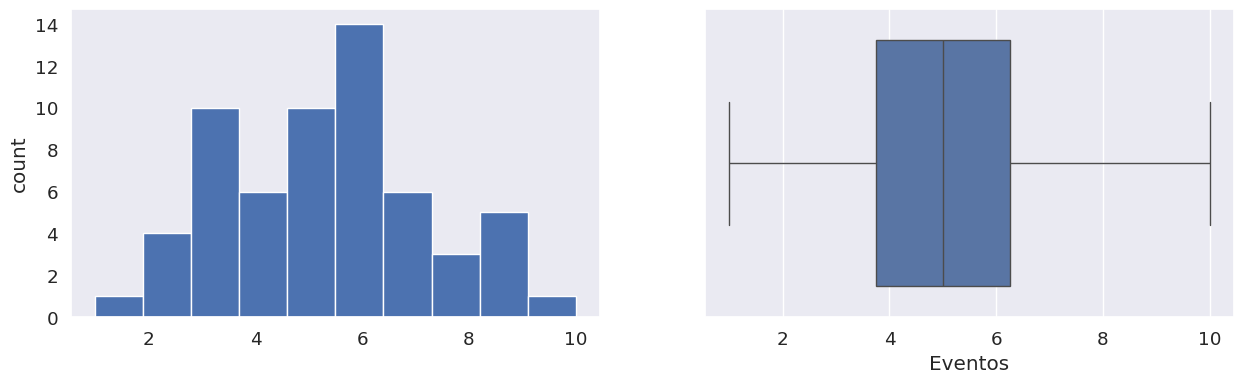

Taxa de Conversão (%)
Skew : 0.02


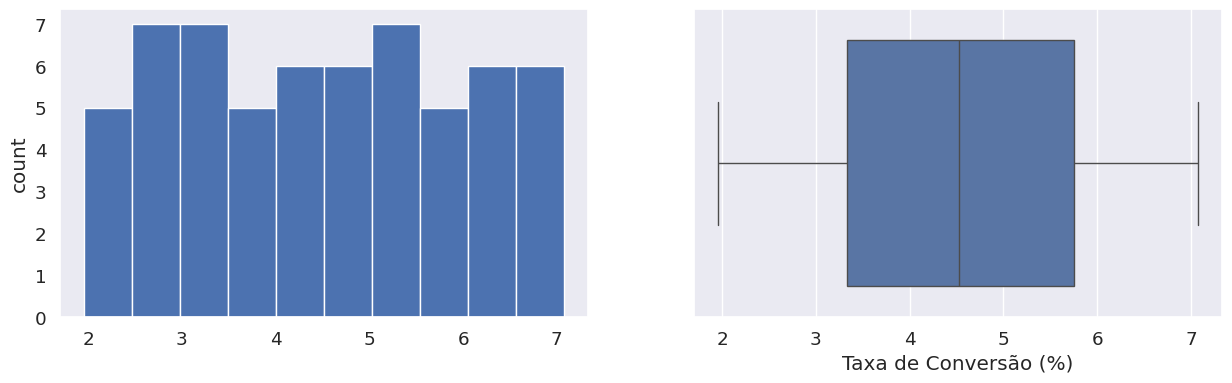

Tempo Médio de Sessão (minutos)
Skew : 0.04


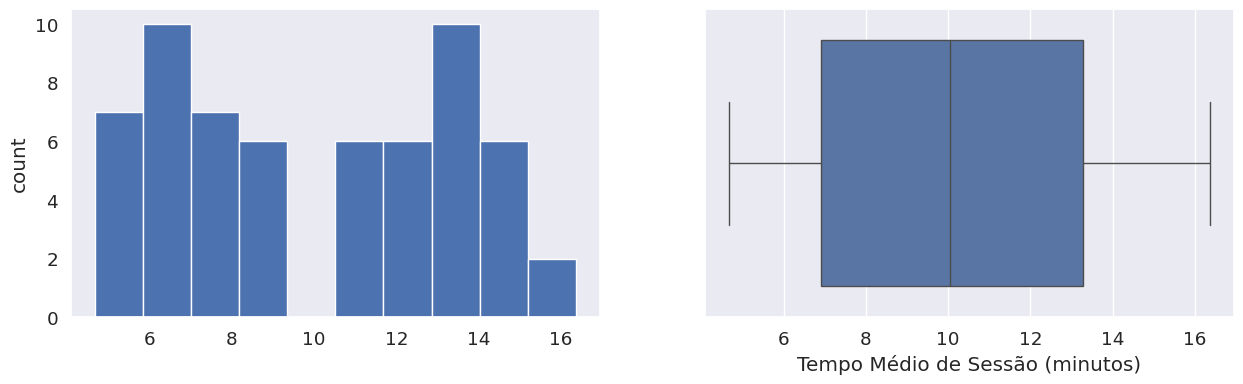

In [142]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [143]:
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [144]:
log_transform(df,['Sessões','Taxa de Conversão (%)'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Data                             60 non-null     object 
 1   Visitantes Únicos                60 non-null     float64
 2   Sessões                          60 non-null     float64
 3   Taxa de Rejeição (%)             60 non-null     float64
 4   Páginas por Sessão               60 non-null     float64
 5   Principais Origens do Tráfego    60 non-null     object 
 6   Dispositivos                     60 non-null     object 
 7   Eventos                          60 non-null     int64  
 8   Taxa de Conversão (%)            60 non-null     float64
 9   Tempo Médio de Sessão (minutos)  60 non-null     float64
 10  Sessões_log                      60 non-null     float64
 11  Taxa de Conversão (%)_log        60 non-null     float64
dtypes: float64(8), int64(1),

<ipython-input-145-9966827e6856>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




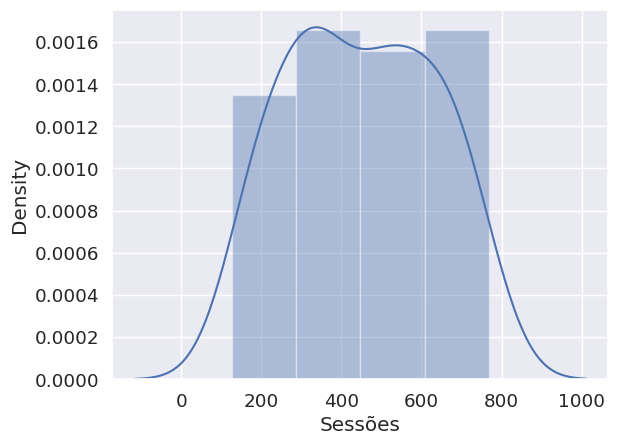

In [145]:
sns.distplot(df["Sessões"], axlabel="Sessões");

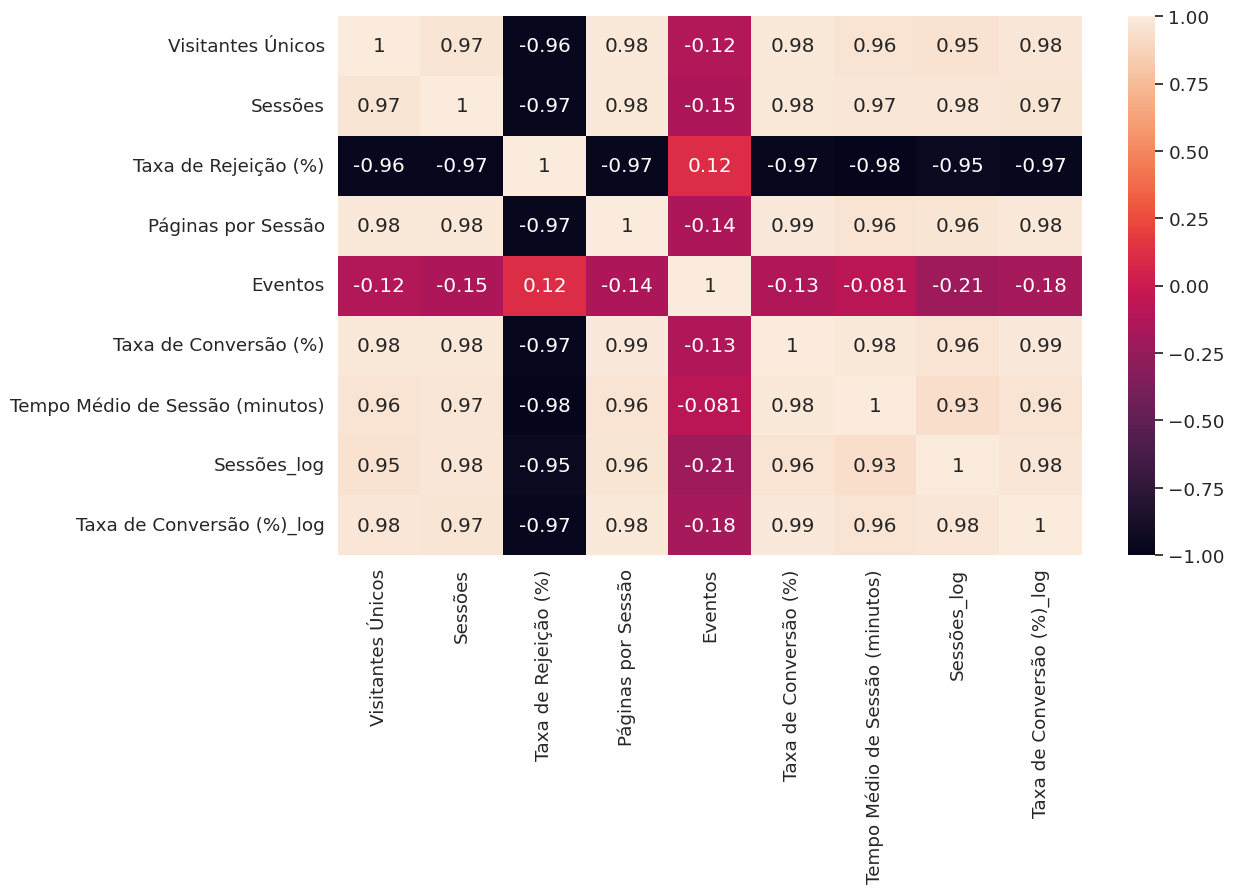

In [146]:
# Escreva sua resposta nesta seção (Você pode criar quantas células de texto e de código forem necessárias)
plt.figure(figsize=(12, 7))
sns.heatmap(df.drop(['Data', 'Principais Origens do Tráfego', 'Dispositivos'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

### Questão 2

**Simulação de Monte Carlo**: Implemente uma simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma. Analise como diferentes variáveis podem impactar os resultados e discuta os cenários que esta simulação pode prever, ajudando a empresa a tomar decisões mais informadas sobre o redesign.

In [152]:
df_1 = df[['Sessões', 'Taxa de Conversão (%)']]
df_1.head(5)

,Sessões,Taxa de Conversão (%)
0,126.0,1.952083
1,157.0,2.066180
2,185.0,2.058858
3,206.0,2.134617
4,155.0,2.420236


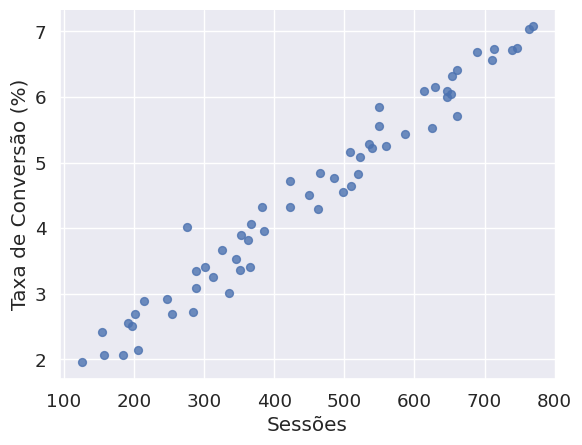

In [151]:
# @title Sessões vs Taxa de Conversão (%)

from matplotlib import pyplot as plt
df_1.plot(kind='scatter', x='Sessões', y='Taxa de Conversão (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [156]:
df_2 = df[['Tempo Médio de Sessão (minutos)', 'Taxa de Conversão (%)']]
df_2.head(5)

,Tempo Médio de Sessão (minutos),Taxa de Conversão (%)
0,5.395516,1.952083
1,4.680899,2.066180
2,5.972584,2.058858
3,4.705854,2.134617
4,5.835801,2.420236


In [158]:
df_1 = df[['Eventos', 'Taxa de Conversão (%)']]
df_1.head(5)

,Eventos,Taxa de Conversão (%)
0,8,1.952083
1,5,2.066180
2,9,2.058858
3,6,2.134617
4,6,2.420236


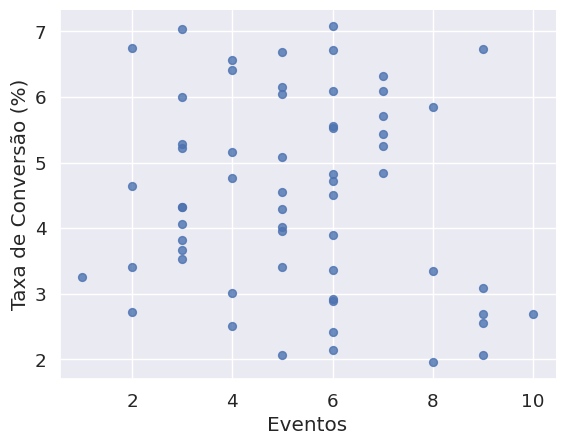

In [159]:
# @title Eventos vs Taxa de Conversão (%)

from matplotlib import pyplot as plt
df_1.plot(kind='scatter', x='Eventos', y='Taxa de Conversão (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

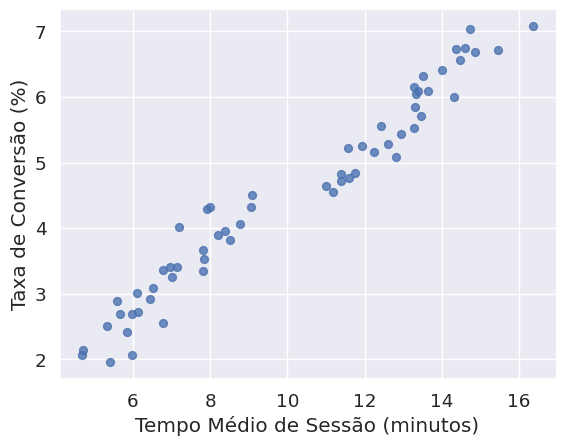

In [157]:
# @title Tempo Médio de Sessão (minutos) vs Taxa de Conversão (%)

from matplotlib import pyplot as plt
df_2.plot(kind='scatter', x='Tempo Médio de Sessão (minutos)', y='Taxa de Conversão (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### Questão 3

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

#Resposta

Como foi visto nos gráficos criados na parte 2, conseguimos visualizar que quanto mais tempo é utilizado na página pelo usuário, maior é a taxa de conversão, podendo focar nesses pontos. Isso permite assumir que conforme as alterações são feitas para aumentar o tempo de permanência na página, também poderão aumentar a taxa de conversão.

Isso também é percebido no aumento do número de sessões. Por mais que não seja intuitivo pensar que a taxa de conversão aumenta conforme o número de seções aumentam, devido a qualidade do lead, isso acontece. Conforme mais pessoas acessam o site, mais pessoas, percentualmente, se convertem.

Já a parte de eventos, é possível notar que mesmo com a frequencia dos eventos aumentando, a taxa de conversão de leads não é constante, podendo significar um problema nos eventos, não sendo muito indicados nesse caso.

## Entrega

Siga esses passos para entregar sua prova.

1. Crie um repositório no GitHub para essa entrega.

2. Submeta seu desenvolvimento neste repositório.

3. Garanta que o repositório é publicamente acessível (eliminatório).

4. No Google forms da prova, submeta a URL do repositório.